In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

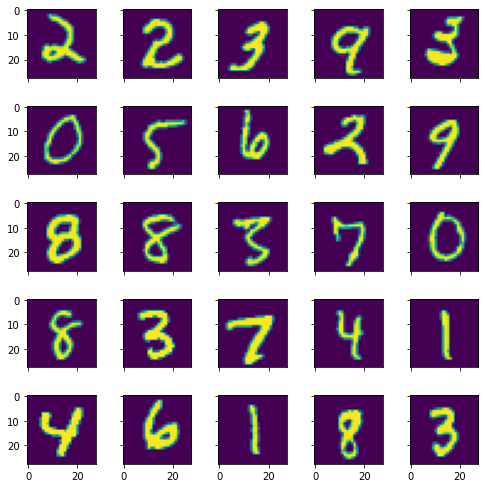

In [3]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(7,7))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[np.random.randint(0, len(X_train))])
plt.show()

In [4]:
X_train = X_train/255
X_test = X_test/255

In [15]:
encoder = Sequential()

encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [16]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape((28, 28)))

In [17]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 25)                420625    
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [18]:
autoencoder.fit(X_train, X_train, epochs=10,
               validation_data=(X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.0895 - val_loss: 0.2016 - val_accuracy: 0.1459
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1775 - accuracy: 0.1721 - val_loss: 0.1603 - val_accuracy: 0.1982
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1570 - accuracy: 0.2021 - val_loss: 0.1552 - val_accuracy: 0.2102
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1470 - accuracy: 0.2137 - val_loss: 0.1404 - val_accuracy: 0.2155
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1384 - accuracy: 0.2256 - val_loss: 0.1326 - val_accuracy: 0.2273
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1332 - accuracy: 0.2343 - val_loss: 0.1293 - val_accuracy: 0.2398
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1297 - accuracy: 0.2396 - val_loss: 0.1270 - val_accuracy:

In [19]:
passed_images = autoencoder.predict(X_test)

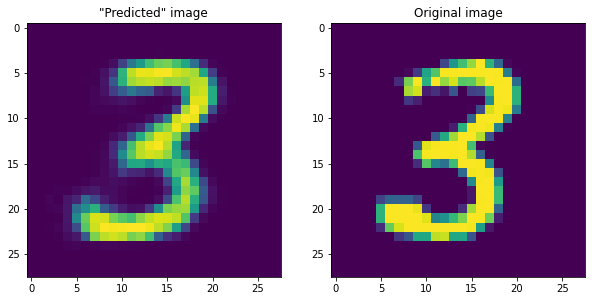

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
n = np.random.randint(0, len(X_test))
axes[0].imshow(passed_images[n])
axes[0].set_title('"Predicted" image')
axes[1].imshow(X_test[n])
axes[1].set_title('Original image')
plt.show()

In [39]:
sample = GaussianNoise(0.2)

In [40]:
sample_noise = sample(X_test, training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



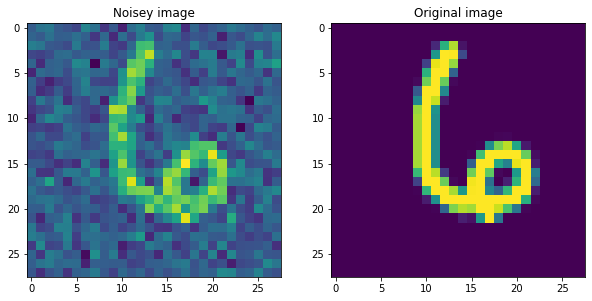

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
n = np.random.randint(0, len(sample_noise))
axes[0].imshow(sample_noise[n])
axes[0].set_title('Noisey image')
axes[1].imshow(X_test[n])
axes[1].set_title('Original image')
plt.show()

In [44]:
encoder = Sequential()

encoder.add(Flatten(input_shape=(28,28)))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [45]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape((28, 28)))

In [47]:
noise_remover = Sequential([encoder, decoder])
noise_remover.compile(loss="binary_crossentropy",
                    optimizer=SGD(lr=1),
                    metrics=['accuracy'])
noise_remover.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 25)                420625    
_________________________________________________________________
sequential_7 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [48]:
noise_remover.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2541 - accuracy: 0.0849
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1948 - accuracy: 0.1481
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1632 - accuracy: 0.1885
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1507 - accuracy: 0.2061
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1432 - accuracy: 0.2166
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1371 - accuracy: 0.2242
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1326 - accuracy: 0.2300
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1297 - accuracy: 0.2346
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1274 - accuracy: 0.2373
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.125

In [49]:
denoised = noise_remover(sample_noise)

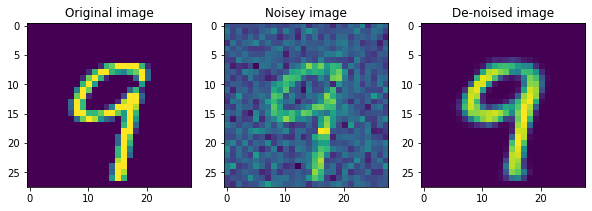

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
n = np.random.randint(0, len(sample_noise))
axes[0].imshow(X_test[n])
axes[0].set_title('Original image')
axes[1].imshow(sample_noise[n])
axes[1].set_title('Noisey image')
axes[2].imshow(denoised[n])
axes[2].set_title('De-noised image')
plt.show()